In [25]:
import pandas as pd
import numpy as np
import datetime

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_csv('Crimes_2015.csv')

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,False,...,7.0,43,02,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
1,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,28.0,27,06,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
2,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,False,...,44.0,6,08A,1169640.0,1921442.0,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)"
3,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,...,36.0,19,02,1134262.0,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)"
4,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,False,...,45.0,11,18,1135867.0,1934466.0,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)"


In [4]:
def process_date(input_date):
    '''Function to process formatted date'''
    try:
        mydate = datetime.datetime.strptime(input_date, '%m/%d/%Y %I:%M:%S %p')
    except:
        mydate = datetime.datetime.strptime('1700', '%Y')
    return mydate


In [5]:
t1 = process_date('06/24/2015 06:00:00 AM')
print(t1)

2015-06-24 06:00:00


In [6]:
df['DateTime'] = df.apply((lambda x: process_date(x['Date'])), axis=1)

In [7]:
# Lets calculate some of the columns for date time grouping!
df['Year'] = df.apply(lambda x: x['DateTime'].year, axis=1)
df['Month'] = df.apply(lambda x: x['DateTime'].month, axis=1)
df['Day'] = df.apply(lambda x: x['DateTime'].day, axis=1)
df['DayOfWeek'] = df.apply(lambda x: x['DateTime'].weekday(), axis=1)
df['Hour'] = df.apply(lambda x: x['DateTime'].hour, axis=1)

In [8]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,DateTime,Month,Day,DayOfWeek,Hour
0,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,False,...,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,2015-01-01 00:00:00,1,1,3,0
1,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,2015-11-24 17:30:00,11,24,1,17
2,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,False,...,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)",2015-05-19 01:12:00,5,19,1,1
3,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,...,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)",2015-01-01 00:00:00,1,1,3,0
4,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,False,...,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)",2015-06-24 06:00:00,6,24,2,6


## OK! So lets start simple... Group by 

We would like to group by the DayOfWeek and the Hour

In [ ]:
dfg = df.groupby(['DayOfWeek', 'Hour'])

In [ ]:
dg2 = df.groupby(['DayOfWeek', 'Hour'])['Latitude'].count()

In [ ]:
dg2.keys()

In [ ]:
type(dg2)

In [ ]:
for idx, val_df in dg2.iteritems():
    print("########{}########".format(idx))
    print(val_df)

In [ ]:
for dgi in dg2:
    print(dgi)

In [ ]:
# Get all of the day of week
dg2[:,0]

In [ ]:
dg2.shape

In [ ]:
dff = pd.DataFrame(dg2)

In [ ]:
# Return all the hours for a day of week
dg2[6]

In [ ]:
# Well this is kinda of cheap, but we know there are 7 days of the week
times = [x for x in range(24)]
day_of_week_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
p = figure(plot_width=800, plot_height=400)

for i in range(7):
    cur_values = dg2[i].tolist()
    # add a line renderer
    p.line(times, cur_values, line_width=2, color=color_list[i], legend=day_of_week_name[i])

show(p)

In [ ]:
times

In [ ]:
dg2[0].tolist()

In [ ]:
########################3
# Lets try to group by another way for plotting

In [9]:
# Create a new data frame and get the count
dfg2 = df.groupby(['DayOfWeek', 'Hour'])['Latitude'].count()
dfg2.name = 'Count'

In [32]:
# Reset the index so we have a df to work with
dfg3 = dfg2.reset_index().groupby(['DayOfWeek'])

In [37]:
# quick test to show that our list to values is working, each row has 
# 24 entries, so that is good, its the number of hours in a day
for idx, cur_df in dfg3:
    print(cur_df['Count'].tolist())

[1676, 940, 761, 690, 496, 459, 647, 937, 1350, 1809, 1702, 1669, 2187, 1776, 1832, 2139, 1948, 1926, 2253, 2180, 2079, 1948, 1804, 1441]
[1487, 888, 618, 581, 416, 411, 639, 942, 1365, 1797, 1702, 1856, 2216, 1775, 1861, 2027, 1949, 2005, 2234, 2201, 2031, 2062, 1861, 1477]
[1560, 796, 683, 590, 438, 461, 636, 935, 1404, 1780, 1688, 1834, 2253, 1902, 1978, 2067, 2039, 2093, 2260, 2151, 2043, 1919, 1819, 1451]
[1754, 954, 771, 630, 510, 490, 624, 1006, 1495, 1846, 1752, 1707, 2184, 1845, 1919, 2119, 2043, 2062, 2141, 2200, 2010, 1993, 1901, 1503]
[1652, 985, 802, 675, 448, 452, 615, 925, 1371, 1803, 1644, 1741, 2231, 1844, 1929, 2191, 2124, 2073, 2310, 2333, 2144, 2111, 2164, 1833]
[1874, 1468, 1390, 1240, 848, 680, 571, 620, 959, 1379, 1540, 1608, 2053, 1649, 1749, 1913, 1797, 1772, 2101, 2093, 2034, 2082, 2124, 1856]
[2056, 1718, 1666, 1340, 1041, 782, 587, 601, 838, 1272, 1351, 1485, 1780, 1508, 1588, 1799, 1762, 1875, 1988, 2040, 2172, 1945, 1954, 1528]


In [39]:
# Lets get plotting using our nice new df
times = [x for x in range(24)]
day_of_week_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
p = figure(plot_width=800, plot_height=400)

for idx, cur_df in dfg3:
#     print(cur_df['Latitude'].tolist())
#     cur_values = dg2[i].tolist()
    # add a line renderer
    p.line(times, cur_df['Count'].tolist(), line_width=2, color=color_list[idx], legend=day_of_week_name[idx])

show(p)

In [40]:
# Ok, so that wasnt so bad!!!
# Now what if we wanted to get it by month as well?
# That should be easy... Right ? 

In [41]:
# Create a new data frame and get the count
dfg2 = df.groupby(['Month', 'DayOfWeek', 'Hour'])['Latitude'].count()
dfg2.name = 'Count'

In [47]:
# Reset the index so we have a df to work with
dfg3 = dfg2.reset_index().groupby(['Month'])

In [54]:
# quick test to show that our list to values is working, each row has 
# 24 entries, so that is good, its the number of hours in a day
p_list = []
for month_idx, month_df in dfg3:
    p = figure(plot_width=800, plot_height=400)
    for day_idx, day_df in month_df.groupby(['DayOfWeek']):
        p.line(times, day_df['Count'].tolist(), line_width=2, color=color_list[day_idx], legend=day_of_week_name[day_idx])
    p_list.append(p)

In [56]:
for cur_p in p_list:
    show(cur_p)

In [57]:
show(p_list[0])

In [58]:
show(p_list[6])

In [66]:
%matplotlib inline

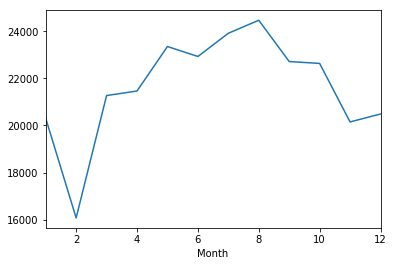

In [67]:
df.groupby(['Month'])['Latitude'].count().plot()